### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import re


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [315]:
data = pd.read_csv('data/coupons.csv')

In [316]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

### Missing Columns

1. Retrieve the information of the dataset to identify the columns it contains and their corresponding data types.
2. Identify the column names that have missing values.


In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [318]:

columns_with_missing_values = data.columns[data.isnull().any()]

for column in columns_with_missing_values:
    print("Column '{}' has missing values.".format(column))



Column 'car' has missing values.
Column 'Bar' has missing values.
Column 'CoffeeHouse' has missing values.
Column 'CarryAway' has missing values.
Column 'RestaurantLessThan20' has missing values.
Column 'Restaurant20To50' has missing values.


### Problematic Data

1. Remove duplicates from the dataset.
2. Get the value counts of each column and inspect if the values are suitable for analysis and visualization.
3. Identify values that are in text format and may pose challenges for visualization and analysis programmatically.


In [319]:
# Remove duplicates
data = data.drop_duplicates()

In [320]:
print('<===Coupon value Counts===>')
print(data['coupon'].value_counts())
print('<===expiration value Counts===>')
print(data['expiration'].value_counts())
print('<===CarryAway value Counts===>')
print(data['CarryAway'].value_counts())
print('<===CoffeeHouse value Counts===>')
print(data['CoffeeHouse'].value_counts())
print('<===RestaurantLessThan20 value Counts===>')
print(data['RestaurantLessThan20'].value_counts())
print('<===car value Counts===>')
print(data['car'].value_counts())
print('<===bar value Counts===>')
print(data['Bar'].value_counts())

<===Coupon value Counts===>
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: coupon, dtype: int64
<===expiration value Counts===>
1d    7031
2h    5579
Name: expiration, dtype: int64
<===CarryAway value Counts===>
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: CarryAway, dtype: int64
<===CoffeeHouse value Counts===>
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: CoffeeHouse, dtype: int64
<===RestaurantLessThan20 value Counts===>
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: RestaurantLessThan20, dtype: int64
<===car value Counts===>
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
<===bar

3. Decide what to do about your missing data -- drop, replace, other...

### Handling Missing and Problemetic Data 
1. After analyzing the missing values, I have decided to fill them with the mean of the column values.
2. Additionally, if a column has a specific pattern that describes an action, I will convert those values to integers and store them in a separate column for further analysis.For example, in columns like 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', and 'Bar', the values follow patterns such a less1, gt8 etc.,
3. For data attributes like expiration, which are in formats such as 1d, 2h, etc., I will convert them into hours and store the values in a different column.
4. Calculating the average income in a separate column from the income attribute, considering that it is in the format of ranges

In [321]:

# The data attributes 'CoffeeHouse','CarryAway', 'RestaurantLessThan20','Restaurant20To50','Bar' has mappings of 1-3, 4-8, less1,gt8 and never.
#This function will take mappings with integer values as input and create new columns in the dataframe with the suffix "_int" for each corresponding real column.
#It will also calculate the mean based on the new "_int" columns and fill any missing values with the calculated mean
def map_columns_to_int_and_fill_missing_values(df, columns):
    # mapping of values which needs covertion
    mapping = {
        '1~3': 1,
        '4~8': 2,
        'less1': 3,
        'gt8': 4,
        'never': 5
    }
    mean_values = {}

    for column in columns:
        df[column + '_Int'] = df[column].map(mapping)
        mean_values[column] = int(df[column + '_Int'].mean())

        df[column].fillna(df[column + '_Int'].map({v: k for k, v in mapping.items()}), inplace=True)
        df[column + '_Int'].fillna(mean_values[column], inplace=True)
    
    return df

# columns to process
columns_to_process = ['CoffeeHouse','CarryAway', 'RestaurantLessThan20','Restaurant20To50','Bar']
data = map_columns_to_int_and_fill_missing_values(data, columns_to_process)
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,0,1,1,5.0,2.0,2.0,1.0,5.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,1,0,5.0,2.0,2.0,1.0,5.0


In [322]:
# convert the format of 1d, 2h into hours 
def convert_to_hours(duration):
    pattern = r'(\d+)([dh])'
    matches = re.findall(pattern, duration)
    
    total_hours = 0
    
    for match in matches:
        value = int(match[0])
        unit = match[1]
        
        if unit == 'd':
            total_hours += value * 24
        elif unit == 'h':
            total_hours += value
            
    return total_hours

# convert the 1d, 2h etc., to hours and store into expiration_hours column
data['expiration_hours'] = data['expiration'].apply(convert_to_hours)
data.head(2)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ25min,direction_same,direction_opp,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int,expiration_hours
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,1,1,5.0,2.0,2.0,1.0,5.0,24
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,1,0,5.0,2.0,2.0,1.0,5.0,2


In [323]:
# convert the coupon types to integers
def map_categories_to_int(df, column):
    category_mapping = {
        'Restaurant(<$20)': 1,
        'Coffee House': 2,
        'Carry out & Take away': 3,
        'Bar': 4,
        'Restaurant($20-$50)': 5
    }
    df[column + '_Int'] = df[column].map(category_mapping)
    return df

# convert the coupon description to integer store into expiration_hours column
data = map_categories_to_int(data, 'coupon')


data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,direction_opp,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int,expiration_hours,coupon_Int
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,1,1,5.0,2.0,2.0,1.0,5.0,24,NaN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,5.0,2.0,2.0,1.0,5.0,2,2.0


In [324]:
# converting age to ingeger and storing in different column
import numpy as np

def convert_age_to_int(df, column):
    # Define a mapping for 'below21' and '50plus' values
    age_mapping = {
        'below21': 20,
        '50plus': 50
    }

    # Convert the age column to numeric
    df['age_int'] = pd.to_numeric(df[column], errors='coerce')

    # Fill 'below21' and '50plus' values using the mapping
    df['age_int'].fillna(df[column].map(age_mapping), inplace=True)

    # Convert the column to integer data type, handling non-finite values
    #df['age_int'] = df[column].apply(lambda x: int(x) if np.isfinite(x) else np.nan)

    return df


data = convert_age_to_int(data, 'age')
data.head(2)
data['age'].value_counts()


21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: age, dtype: int64

In [325]:
import re
# convering income into integer 
def convert_income_to_numeric(df, column):
    # Extract minimum and maximum values from the income column
    df[['min_income', 'max_income']] = df[column].str.extract(r'\$(\d+) - \$(\d+)')
    
    # Convert minimum and maximum income columns to numeric values
    df['min_income'] = pd.to_numeric(df['min_income'], errors='coerce')
    df['max_income'] = pd.to_numeric(df['max_income'], errors='coerce')
    
    # Calculate the average income
    df['average_income'] = (df['min_income'] + df['max_income']) / 2
    
    # Drop unnecessary columns
    df.drop(columns=['min_income', 'max_income'], inplace=True)
    
    return df

data = convert_income_to_numeric(data, 'income')
data.head(2)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int,expiration_hours,coupon_Int,age_int,average_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,5.0,2.0,2.0,1.0,5.0,24,NaN,21.0,43749.5
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,5.0,2.0,2.0,1.0,5.0,2,2.0,21.0,43749.5


4. What proportion of the total observations chose to accept the coupon? 



In [326]:
# The column Y stores whether the coupon was accepted or not. Taking the mean of that column will give the proportion of accepted coupons
acceptance_proportion = data['Y'].mean()

print("Proportion of total observations that accepted the coupon: {:.2%}".format(acceptance_proportion))


Proportion of total observations that accepted the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

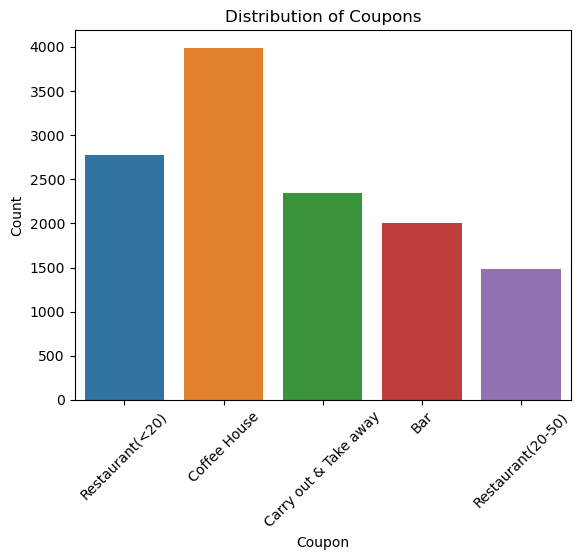

In [327]:
# Create the bar plot
sns.countplot(data=data, x='coupon')

# Add labels and title to the plot
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Distribution of Coupons')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


6. Use a histogram to visualize the temperature column.

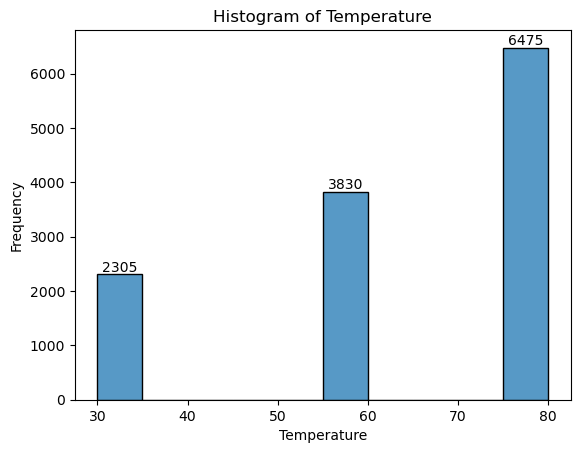

In [328]:
# Create a histogram using seaborn
sns.histplot(data=data, x='temperature', bins=10,kde=False)

# adding annotations to the plot
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')

# Add labels and title to the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Show the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [329]:
# data frame which contains Bar coupons
barcoupons_df = data.loc[data['coupon'].str.contains('Bar')]
barcoupons_df.head(1)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int,expiration_hours,coupon_Int,age_int,average_income
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,5.0,2.0,2.0,1.0,5.0,24,4.0,21.0,43749.5


2. What proportion of bar coupons were accepted?


In [330]:
# coupon accepted or not stored in the column Y. So taking mean of that column will give propotion
acceptance_proportion = barcoupons_df['Y'].mean()

print("Proportion of total observations that accepted the Bar coupon: {:.2%}".format(acceptance_proportion))


Proportion of total observations that accepted the Bar coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [331]:
# function to calculate the acceptance rate
def compare_acceptance_rates(acceptance_rate_group1, acceptance_rate_group2):
    # Calculate the percentage difference
    percentage_difference = ((acceptance_rate_group1 - acceptance_rate_group2) / acceptance_rate_group2) * 100

    # Compare the percentage difference
    if percentage_difference > 0:
        result = f"Group 1 has a {percentage_difference:.2f}% higher acceptance rate than Group 2."
    elif percentage_difference < 0:
        result = f"Group 2 has a {abs(percentage_difference):.2f}% higher acceptance rate than Group 1."
    else:
        result = "Both groups have equal acceptance rates."

    return result



Acceptance rate for those who went to a bar 3 or fewer times: 0.65
Acceptance rate for those who went to a bar more than 3 times: 0.77
Group 2 has a 15.80% higher acceptance rate than Group 1.


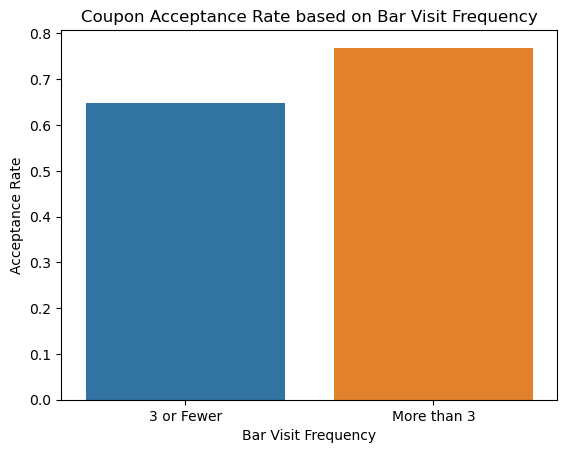

In [332]:
less_than_4 = barcoupons_df[barcoupons_df['Bar'] == '1~3']  # Subset for those who went to a bar 3 or fewer times
more_than_4 = barcoupons_df[barcoupons_df['Bar'].isin(['4~8', 'gt8'])]  # Subset for those who went to a bar more than 3 times

# Calculate the acceptance rate for each group
acceptance_rate_less_than_4 = less_than_4['Y'].mean()
acceptance_rate_more_than_4 = more_than_4['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 or fewer times: {acceptance_rate_less_than_4:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times: {acceptance_rate_more_than_4:.2f}")

print(compare_acceptance_rates(acceptance_rate_less_than_4,acceptance_rate_more_than_4))
# Define the x-axis values
sns.barplot(x=['3 or Fewer', 'More than 3'], y=[acceptance_rate_less_than_4, acceptance_rate_more_than_4])

# Add labels and title to the plot
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rate based on Bar Visit Frequency')

# Show the plot
plt.show()

#### Creating a pie chart to visualize the acceptance rate between those who went to a bar 3 or fewer times a month and those who went more frequently.

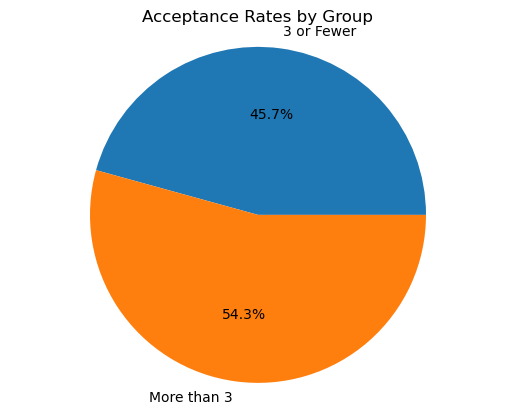

In [333]:
acceptance_rates_4 = [acceptance_rate_less_than_4,acceptance_rate_more_than_4]
labels_4 = ['3 or Fewer', 'More than 3']
# Plot the comparison using a pie plot
# Create a pie chart
plt.pie(acceptance_rates_4, labels=labels_4, autopct='%1.1f%%')
plt.title('Acceptance Rates by Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for those who went to a bar 1 or more times and age 25+: 0.54
Acceptance rate for those who went to a bar more than 3 times: 0.31
Group 1 has a 78.09% higher acceptance rate than Group 2.


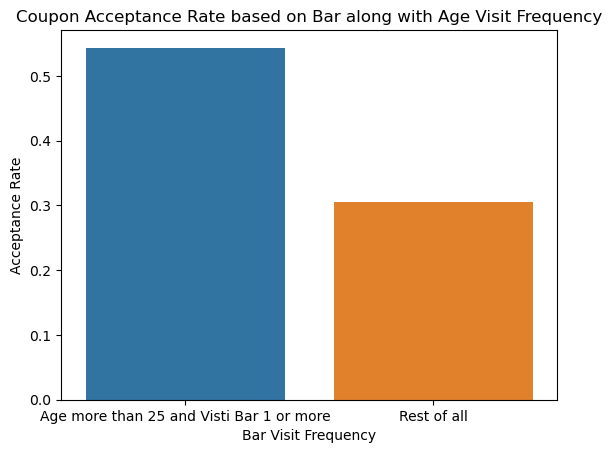

In [334]:

# Getting the age of drivers (using the age_int new column created from age) who are over 25 and have accepted the bar coupon
# as the value counts shows ages more thann 25 are all except 21 and below21 so excluding them
# Bar_Int is the I have computed from Bar. number 5 is allocated to 5 rest are 1-3 etc are the ones.
barcoupons_age_25_filtered = barcoupons_df.query('Bar_Int < 5 and age_int > 25')

# getting all other drivers accepted bar coupons
barcoupons_age_all_others = barcoupons_df[~barcoupons_df.index.isin(barcoupons_age_25_filtered.index)]

# Calculate the acceptance rate for each group
mean_25 = barcoupons_age_25_filtered['Y'].mean()
mean_all = barcoupons_age_all_others['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 1 or more times and age 25+: {mean_25:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times: {mean_all:.2f}")

# Compare the acceptance rates
print(compare_acceptance_rates(mean_25,mean_all))

# Define the x-axis values
sns.barplot(x=['Age more than 25 and Visti Bar 1 or more', 'Rest of all'], y=[mean_25, mean_all])

# Add labels and title to the plot
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rate based on Bar along with Age Visit Frequency')

# Show the plot
plt.show()


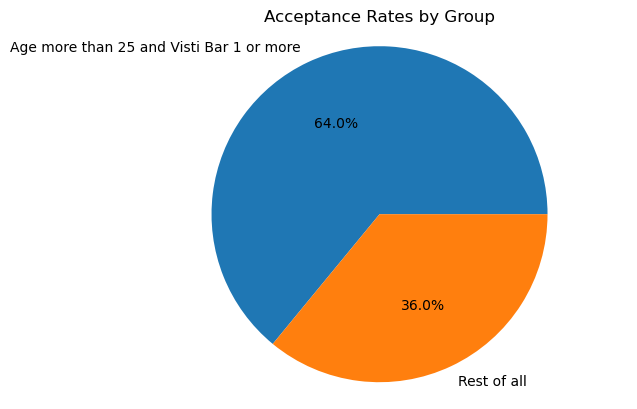

In [335]:
# creating an array with means for pie chart
acceptance_rates_25 = [mean_25, mean_all]
labels_25 =['Age more than 25 and Visti Bar 1 or more','Rest of all']

# Plot the comparison using a pie plot
# Create a pie chart
plt.pie(acceptance_rates_25, labels=labels_25, autopct='%1.1f%%')
plt.title('Acceptance Rates by Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


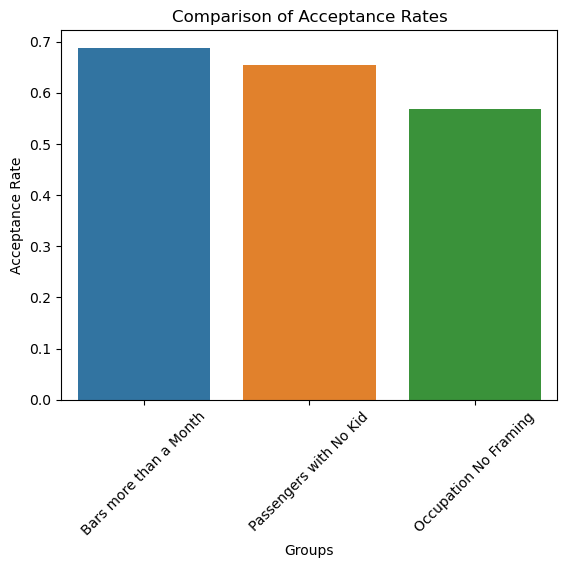

In [336]:
# A group of drivers who go to a bar once a month.
bar_more_once_month_list = barcoupons_df.query('Bar in["1~3","4~8","gt8"]')
# A group of drivers who have passengers with no kids.
drivers_has_passenger_list = data.query('passanger in ["Friend(s)", "Partner"]')
# A group of drivers who are not in farming.
drivers_has_not_farming_list = data.query('occupation not in["farming","fishing","forestry"]')

# Calculate the acceptance rate for each group
bar_more_once_month_list_mean = bar_more_once_month_list['Y'].mean()
drivers_has_passenger_list_mean = drivers_has_passenger_list['Y'].mean()
drivers_has_not_farming_list_mean = drivers_has_not_farming_list['Y'].mean()

group_names = ['bar_more_once_month_list_mean', 'drivers_has_passenger_list_mean', 'drivers_has_not_farming_list_mean']
labels = ['Bars more than a Month', 'Passengers with No Kid', 'Occupation No Framing']

# Create a DataFrame with the acceptance rates and group names
group_data = pd.DataFrame({'Group': group_names,
                     'Acceptance Rate': [bar_more_once_month_list_mean, drivers_has_passenger_list_mean, drivers_has_not_farming_list_mean]})

# Plot the comparison using a bar plot
sns.barplot(x='Group', y='Acceptance Rate', data=group_data, order=group_names)
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Acceptance Rates')
plt.xticks(range(len(group_names)), labels,rotation=45)  # Set custom labels on x-axis
plt.show()
                                        
                                        
                                        

#### Creating a pie chart to visualize the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

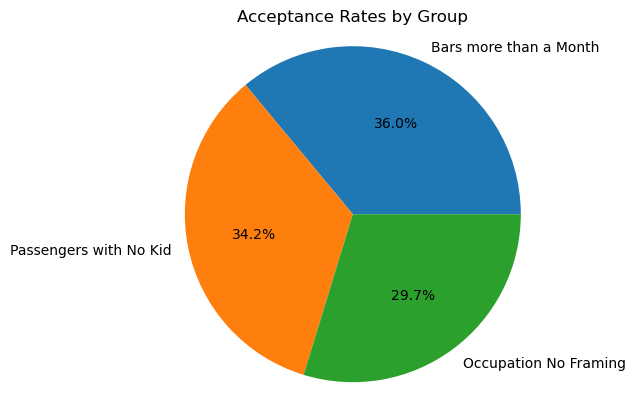

In [337]:
acceptance_rates = [bar_more_once_month_list_mean, drivers_has_passenger_list_mean, drivers_has_not_farming_list_mean]

# Plot the comparison using a pie plot
# Create a pie chart
plt.pie(acceptance_rates, labels=labels, autopct='%1.1f%%')
plt.title('Acceptance Rates by Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Married partner      875
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64


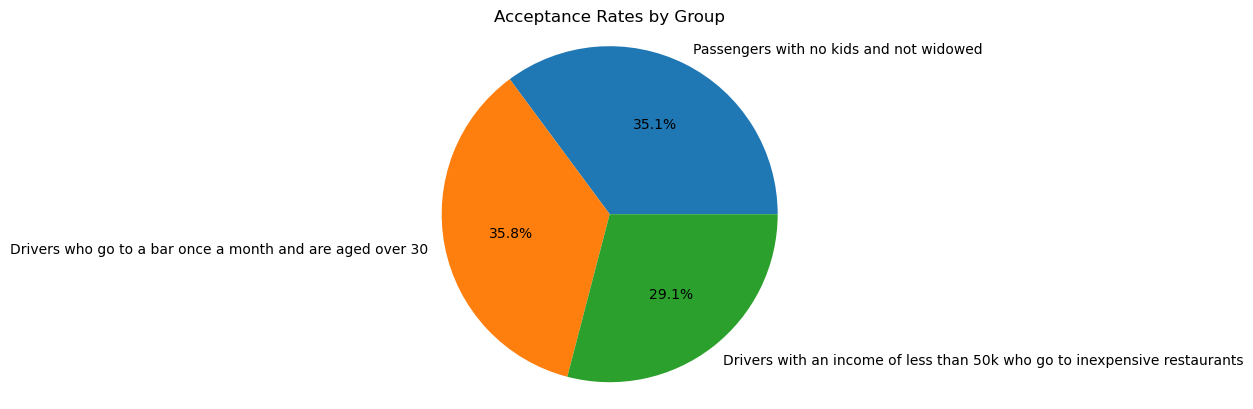

In [338]:
# finding out unique values of marrital status
print(barcoupons_df['maritalStatus'].value_counts())

# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bc_nokids_windowed = barcoupons_df.query('Bar in["1~3","4~8","gt8"] and passanger in ["Friend(s)", "Partner"] \
                                        and maritalStatus not in["Widowed"]')
#go to bars more than once a month and are under the age of 30
bc_age_lt_30 = barcoupons_df.query('Bar in["1~3","4~8","gt8"] and age_int < 30')

#go to cheap restaurants more than 4 times a month and income is less than 50K
rc_income_lt_50 = data.query('average_income < 50000 and RestaurantLessThan20 in ["4~8","gt8"]')

# Calculate the acceptance rate for each group
bc_nokids_windowed_mean = bc_nokids_windowed['Y'].mean()
bc_rt_lt_20_mean = bc_rt_lt_20['Y'].mean()
rc_income_lt_50_mean = rc_income_lt_50['Y'].mean()

# creating an array to plot the pie chart
acceptance_rates_u2 = [bc_nokids_windowed_mean, bc_rt_lt_20_mean, rc_income_lt_50_mean]

# Define the group names and corresponding labels
labels_u2 = ['Passengers with no kids and not widowed', 'Drivers who go to a bar once a month and are aged over 30', 'Drivers with an income of less than 50k who go to inexpensive restaurants']


# Plot the comparison using a pie plot
# Create a pie chart
plt.pie(acceptance_rates_u2, labels=labels_u2, autopct='%1.1f%%')
plt.title('Acceptance Rates by Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Here are my observations
* Bar coupon acceptance criteria
    * The proportion of total observations that accepted the Bar coupon is 41.00%. This indicates a significant portion 
      of the drivers accepted the coupon.

    * Drivers who go to a bar less than 3 times have an acceptance rate of 43%, which is higher than the overall 
      proportion. This suggests that drivers who visit bars less frequently are still receptive to the coupo.

    * Drivers who go to a bar more than 3 times have a higher acceptance rate of 54.3%. This indicates that frequent  
      bar-goers are more likely to accept the coupon.

    * Drivers who go to a bar more than once a month and are above the age of 25 have the highest acceptance rate of 
      62%. This group shows a strong inclination towards accepting the coupon, indicating that regular bar visitors are more likely to accept the offer.


* Bar Coupon non-acceptance criteria
    * Drivers below the age of 25 have a lower acceptance rate of 37%. This group appears to be less interested in 
      accepting the coupon, indicating that their bar visit frequency may not be a significant factor in their acceptance decision.

    * Drivers who have no kids, are not widowed, and go to a bar once a month and are over the age of 30 have acceptance 
      rates ranging from 35% to 35.8%. These groups demonstrate a moderate likelihood of accepting the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### I am analyzing the coffee house coupon data to explore the characteristics of passengers who accept the coupons.


### Proportion of total observations that accepted the Coffee House coupon

In [339]:
# data frame which contains Coffe House coupons
chcoupons_df = data.loc[data['coupon'].str.contains('Coffee House')]
chcoupons_df.head(1)

# coupon accepted or not stored in the column Y. So taking mean of that column will give propotion
ch_acceptance_proportion = chcoupons_df['Y'].mean()

print("Proportion of total observations that accepted the Coffee House coupon: {:.2%}".format(ch_acceptance_proportion))

Proportion of total observations that accepted the Coffee House coupon: 49.86%


### Find out if there is a relationship between occupation and coupon acceptance for the Coffee House category
This code will create a bar plot using the acceptance rates for each occupation stored in the occupation_acceptance Series. 
The x-axis will represent the different occupations, and the y-axis will represent the acceptance rates. 
The plt.xticks(rotation=90) line is used to rotate the x-axis labels by 90 degrees for better visibility if the occupation labels are long.



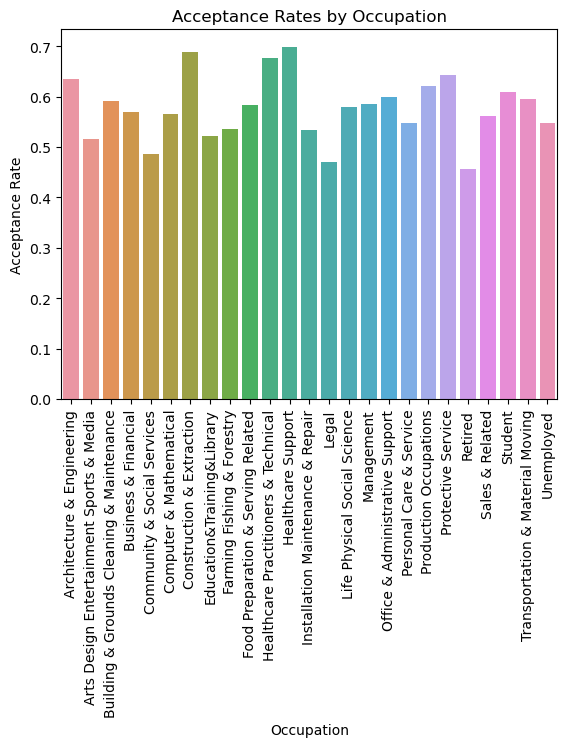

In [340]:
# data set groupby occupation and acceptance
occupation_acceptance = data.groupby('occupation')['Y'].mean()

sns.barplot(x=occupation_acceptance.index, y=occupation_acceptance.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Set the axis labels and plot title
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rates by Occupation')

# Display the plot
plt.show()

### Find out if there is a relationship between coupon acceptance and the presence of passengers among drivers
This code will create a contingency table using the crosstab function, considering the 'passenger' and 'age_int' columns as the indices.
The 'acceptance' column is used to calculate the sum of accepted coupons for each combination of passenger type and age group. The resulting table is then visualized as a heatmap using Seaborn's heatmap function.



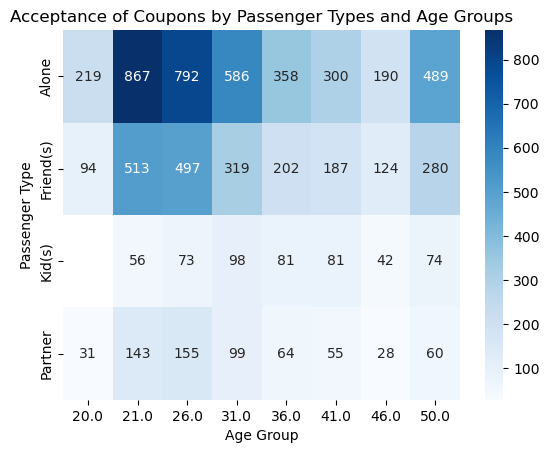

In [341]:
# Create a contingency table or cross-tabulation
cross_tab = pd.crosstab(index=data['passanger'], columns=data['age_int'],
                        values=data['Y'], aggfunc='sum')

# Plot a heatmap to visualize the relationship between passenger types, age groups, and acceptance
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Acceptance of Coupons by Passenger Types and Age Groups')

# Set the axis labels
plt.xlabel('Age Group')
plt.ylabel('Passenger Type')

# Display the plot
plt.show()


### Find out if weather and temperature have an effect on drivers' coupon acceptance.
This code will create a bar plot using Seaborn's barplot function, with weather conditions on the x-axis, acceptance rate on the y-axis, and different temperature ranges represented by different colors (hue). The x-axis labels can be rotated if needed using plt.xticks(rotation=45).


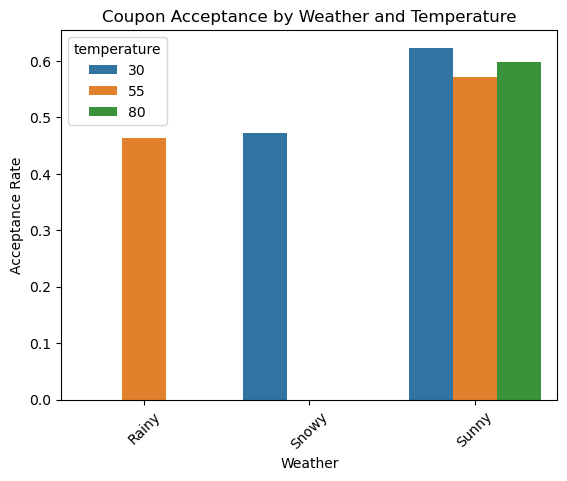

In [342]:
# Group the data by weather and temperature and calculate the acceptance rate
grouped_data = data.groupby(['weather', 'temperature'])['Y'].mean().reset_index()

# Create a bar plot to visualize the acceptance rate
sns.barplot(x='weather', y='Y', hue='temperature', data=grouped_data)
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance by Weather and Temperature')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Here are my observations 
* Coffee House coupon acceptance criteria
    * The Proportion of total observations that accepted the Coffee House coupon: 49.86%.This indicates that a 
      significant portion of the drivers accepted the coupon

    * Drivers under the age of 31 who drive alone tend to visit coffee houses more frequently.

    * Drivers under the age of 31 who have friends also tend to visit coffee houses more frequently.

    * Drivers are more likely to visit coffee houses during sunny weather.


* Coffee House coupon non-acceptance criteria
    * Occupation does not significantly affect the acceptance of coffee house coupons

    * Drivers are less likely to visit coffee houses during rainy/snowy weather.


### Next steps and recommendations
* Target Specific Age Groups: Since age appears to be a significant factor in coupon acceptance, consider tailoring marketing campaigns or offers to different age groups. Focus on drivers under the age of 25 who have a lower acceptance rate for the Bar coupon and drivers under the age of 31 who visit coffee houses more frequently. Create targeted promotions that resonate with these age groups and address their specific preferences and interests.

* Segment Frequent Bar-goers: Identify drivers who go to a bar more than 3 times a month and drivers who visit coffee houses more frequently. These are the segments with higher acceptance rates for both types of coupons. Develop loyalty programs or exclusive offers for these segments to further incentivize their continued patronage.

* Weather-based Promotions: Leverage the observed preferences for different weather conditions. Promote bar visits during pleasant weather and coffee house visits during specific weather conditions. Tailor promotions, themes, or seasonal discounts accordingly to align with drivers' preferences and enhance their experience.

* Personalized Offers: Utilize customer data and preferences to personalize coupon offers. Consider integrating data from other sources, such as occupation or income, to create more targeted and relevant promotions. Leverage customer segmentation strategies to deliver personalized offers based on individual preferences and behaviors.

* Customer Engagement and Feedback: Encourage drivers to provide feedback through surveys or online platforms to gain insights into their preferences and expectations. Actively engage with customers through social media, email marketing, or loyalty programs to foster a sense of community and gather valuable feedback. Use this feedback to continuously improve coupon offerings and better meet customer needs.

* Analyze Overall Market Trends: Monitor broader market trends, competitor strategies, and emerging consumer preferences. Stay updated on industry developments and adapt marketing approaches to stay competitive and address evolving customer demands

Overall, it is crucial to continue analyzing and monitoring the data, adjusting marketing strategies, and staying responsive to customer preferences and trends. Regularly evaluate the effectiveness of different approaches and make data-driven decisions to optimize coupon acceptance.





